In [3]:
import sys
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

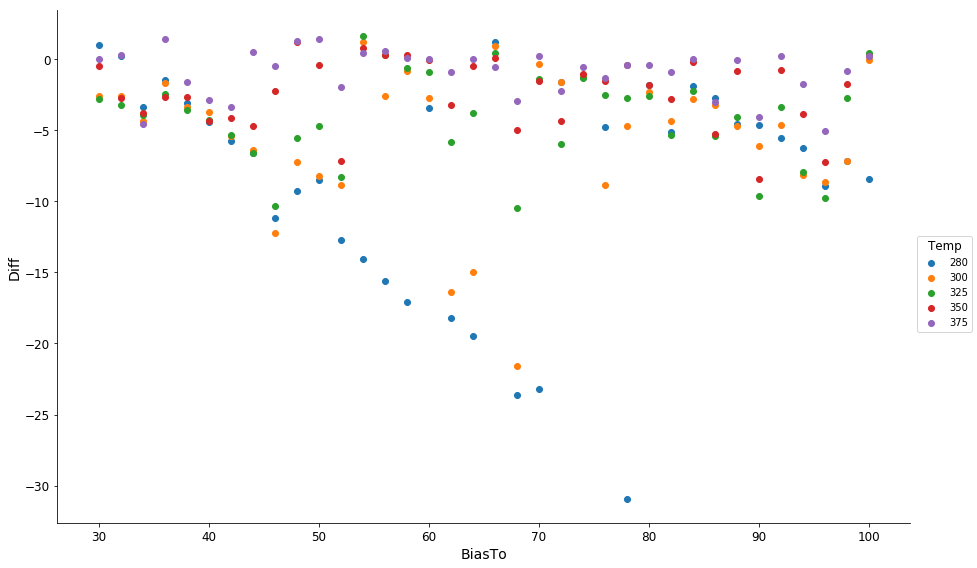

In [48]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/sixth/rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_3_18_Apr_220421.feather")
dic = {"T0":280, "T1":300, "T2":325, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [49]:
rerun1["A"] = rerun1["AMH-Go"]

(1, 44)


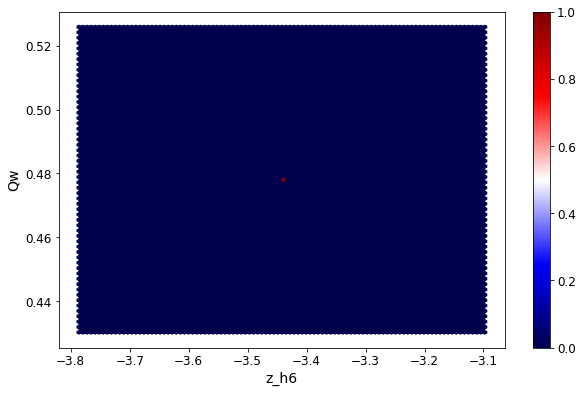

In [56]:
t = rerun1.query(" Qw > 0.45 and A > -410")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)
print(t.shape)

In [57]:
t

Step  Run  Temp        Qw      Energy    DisReal  z_average  \
746019  38676000    3   375  0.478038 -692.262747  34.748474  -0.037852   

        abs_z_average      z_h1     z_h2    ...        Lipid9   Lipid10  \
746019      11.082447  0.329186 -4.93307    ...      2.580536 -1.854216   

         Lipid11   Lipid12   Lipid13   Lipid14   Lipid15      TotalE  BiasTo  \
746019  2.174274 -2.029128  0.044288 -4.959348  2.430202 -692.543484    52.0   

                A  
746019 -407.35098  

[1 rows x 44 columns]

(15, 44)


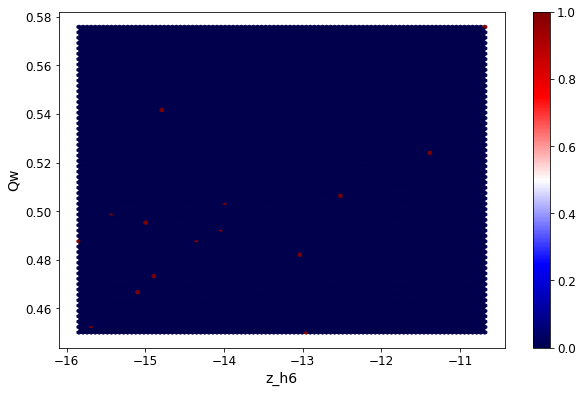

In [59]:
t = rerun1.query(" Qw > 0.45 and z_h6 > -16 and z_h6 < -10")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)
print(t.shape)

In [60]:
t["Distance"]

348838    41.031055
348850    33.973365
480602    37.417546
486650    41.773973
487442    42.090359
487454    38.320434
488378    41.186078
491078    36.519706
491090    34.309122
491102    30.595530
491114    27.083310
491126    32.064842
491138    33.092049
558853    36.293951
926016    37.991035
Name: Distance, dtype: float64

In [54]:
t["AMH-Go"]

165231    -473.507731
171831    -483.171682
213793    -451.873859
348838    -453.404904
348850    -467.950760
424372    -453.588570
474373    -437.989229
480602    -427.928858
486650    -438.143047
487442    -434.244490
487454    -420.522364
488378    -433.536633
491078    -430.117134
491090    -438.326357
491102    -431.602940
491114    -431.398316
491126    -435.312696
491138    -447.248602
558853    -449.567060
612897    -476.819231
654374    -464.315937
852136    -475.443524
926016    -444.390752
982549    -472.395185
982561    -458.189932
1050480   -475.484297
1053792   -461.023383
Name: AMH-Go, dtype: float64

In [61]:
t.to_csv("/Users/weilu/Research/server/rerun3.csv")

In [32]:
t["z_h6"]

169687   -17.936083
413047   -16.123231
416959   -16.998263
632226   -17.293526
634746   -15.142301
647826   -17.857342
Name: z_h6, dtype: float64

(23, 44)


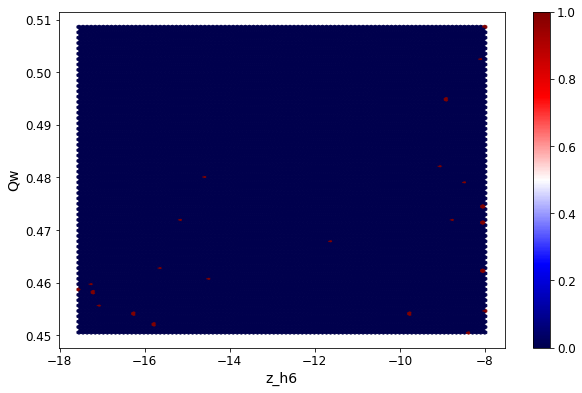

In [35]:
t = rerun1.query("Qw > 0.45 and Qw < 0.6 and z_h6 > -18 and z_h6 < -8")
t.plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)
print(t.shape)

In [33]:
t["DisReal"]

169687    66.009238
413047    81.495232
416959    87.025257
632226    66.216646
634746    69.605130
647826    72.183324
Name: DisReal, dtype: float64

In [15]:
t["AMH-Go"]

126651    -434.812468
127335    -435.337225
131595    -430.404867
131607    -438.401044
131619    -436.677166
131631    -438.187377
131667    -441.371798
131679    -439.961290
132303    -443.646994
169961    -460.434225
176417    -459.414029
393403    -439.663604
552680    -433.854146
600381    -434.327205
606021    -422.882388
606033    -443.030481
948848    -457.519832
949964    -452.763558
986017    -452.229263
1072632   -416.370541
1072944   -437.246998
1072968   -440.831191
1074372   -464.437889
Name: AMH-Go, dtype: float64

In [11]:
t.to_csv("/Users/weilu/Research/server/barrier.csv")

## force is 0.2, which is 13pN.

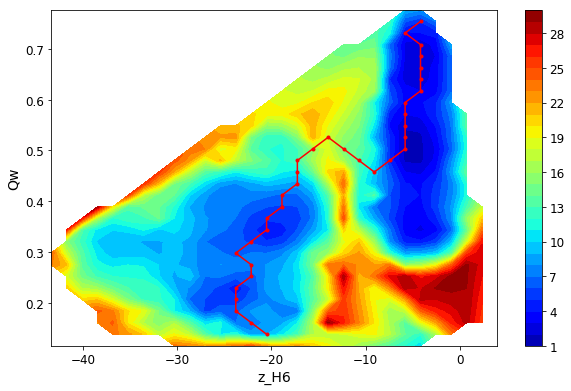

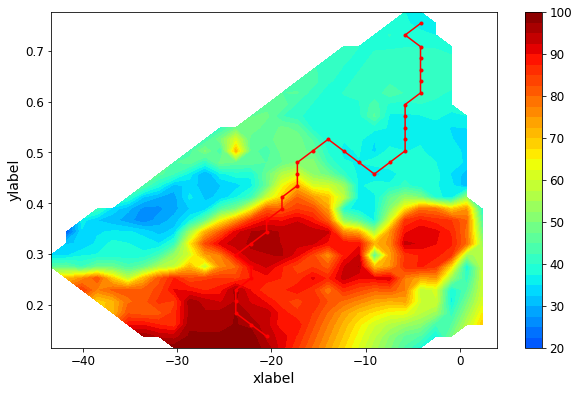

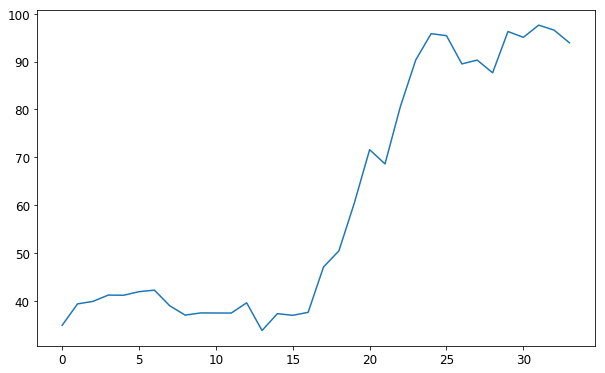

In [133]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 260
location = pre + "/sixth_with_real_distance_2/_280-350/2d_z_qw/without_subsample_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), end=(28,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

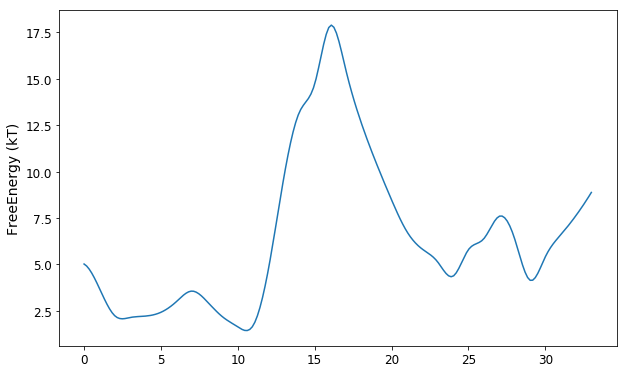

In [170]:
from scipy.interpolate import CubicSpline
x = np.array(range(len(f)))
x_smooth1 = np.linspace(x.min(), x.max(), 200)
spl1 = scipy.interpolate.interp1d(x, f, kind="cubic")
plt.ylabel("FreeEnergy (kT)")
plt.plot(x_smooth1, spl1(x_smooth1))

plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/smoothed_shortest_path.png")

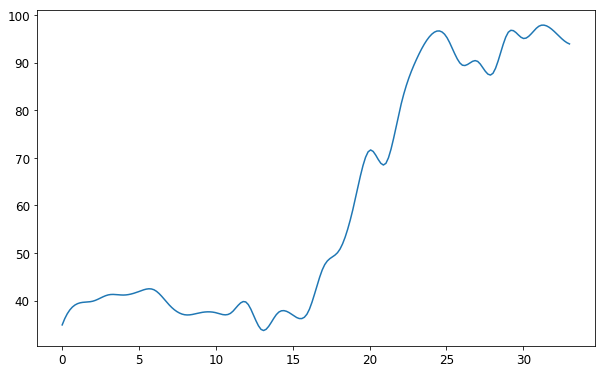

In [129]:
f_on_path
x = np.array(range(len(f_on_path)))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_on_path, kind="cubic")
plt.plot(x_smooth, spl(x_smooth))
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/smoothed_shortest_path_expected_dis.png")

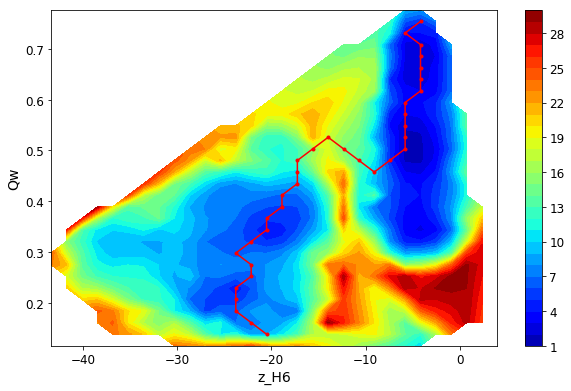

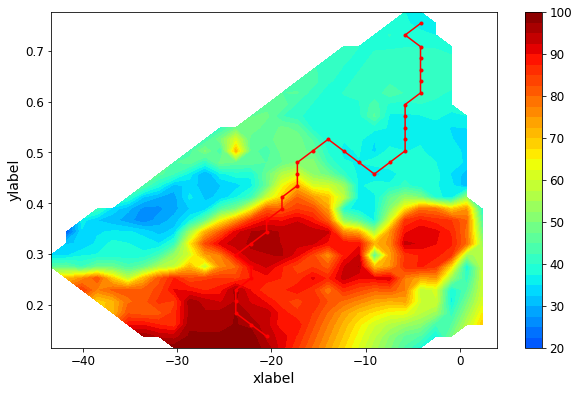

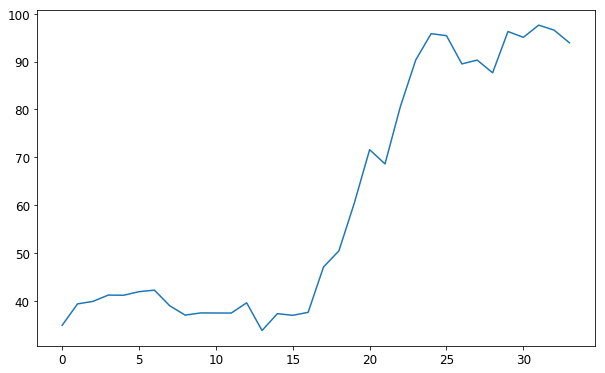

In [162]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 260
location = pre + "/sixth_with_real_distance_2/_280-350/2d_z_qw/without_subsample_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), end=(28,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

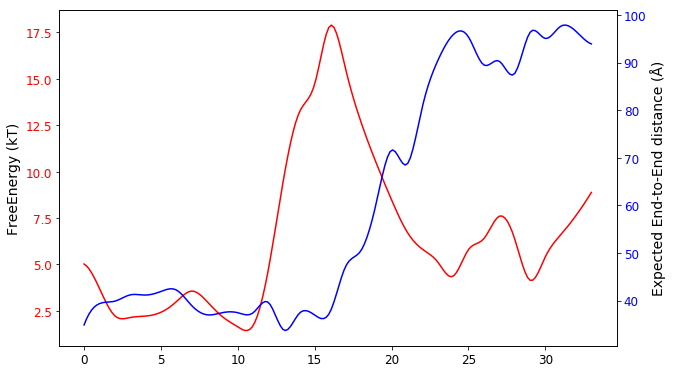

In [171]:
from scipy.interpolate import CubicSpline
x = np.array(range(len(f)))
spl1 = scipy.interpolate.interp1d(x, f, kind="cubic")
# plt.plot(x_smooth1, spl1(x_smooth1))
f_on_path
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_on_path, kind="cubic")
# plt.plot(x_smooth, spl(x_smooth))
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, x_smooth, spl1(x_smooth), spl(x_smooth), 'r', 'b')

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
# plt.show()
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/freeEnergy_Distance.png")

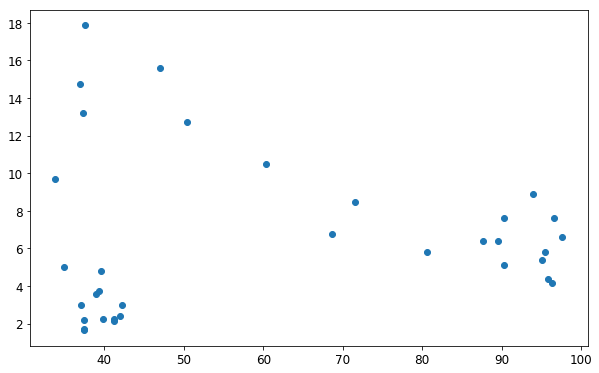

In [167]:
plt.scatter(f_on_path, f)

In [165]:
xi.shape

(30,)

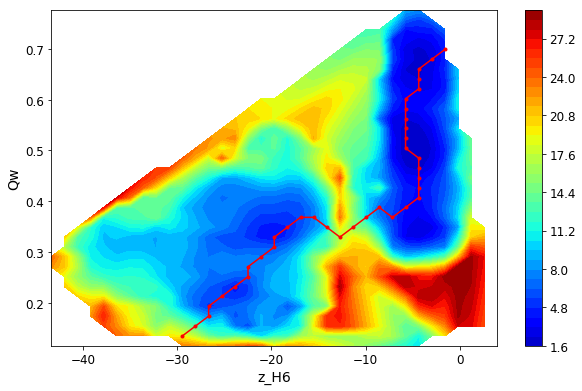

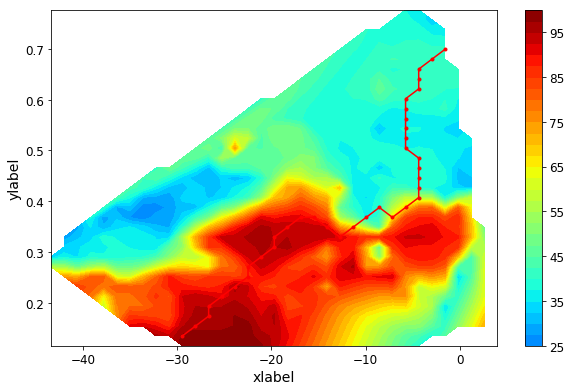

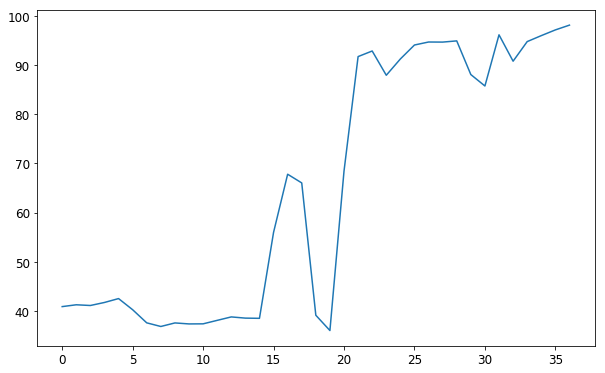

In [159]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 260
res = 35
location = pre + "/sixth_with_real_distance_2/_280-350/2d_z_qw/without_subsample_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), end=(30,30), save=False, xlabel="z_H6", ylabel="Qw",res=res)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100, res=res)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

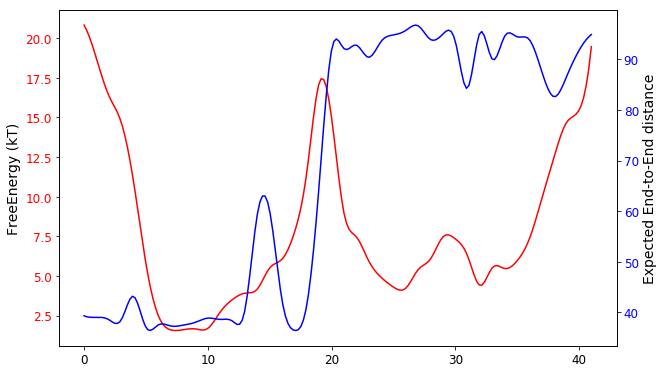

In [153]:
from scipy.interpolate import CubicSpline
x = np.array(range(len(f)))
spl1 = scipy.interpolate.interp1d(x, f, kind="cubic")
# plt.plot(x_smooth1, spl1(x_smooth1))
f_on_path
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_on_path, kind="cubic")
# plt.plot(x_smooth, spl(x_smooth))
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, x_smooth, spl1(x_smooth), spl(x_smooth), 'r', 'b')

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()

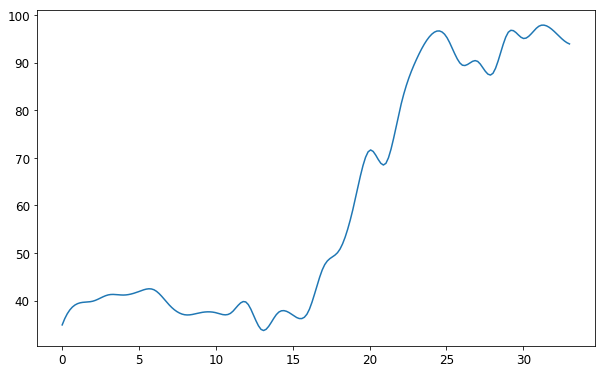

In [139]:
plt.plot(x_smooth1, spl(x_smooth1), x_smooth, spl(x_smooth))

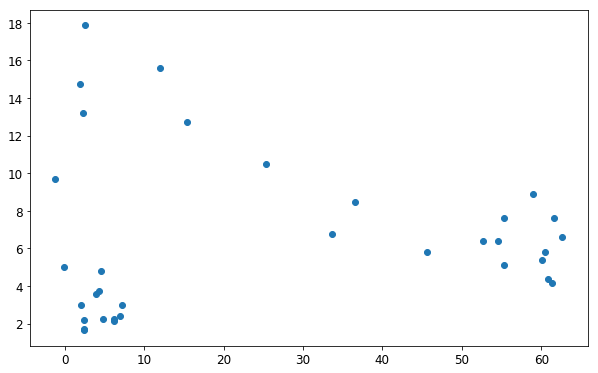

In [126]:
plt.scatter(np.array(f_on_path)-35, f)

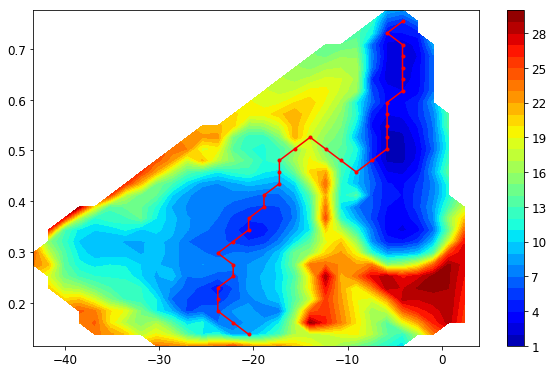

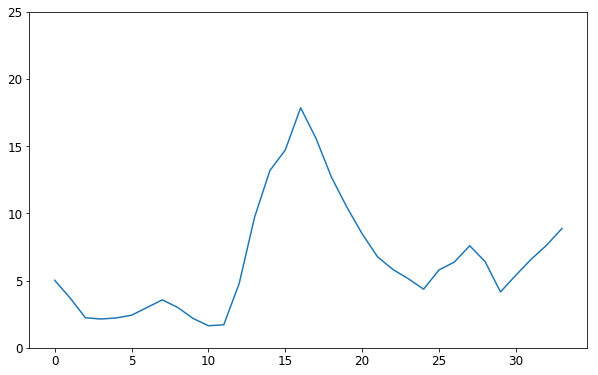

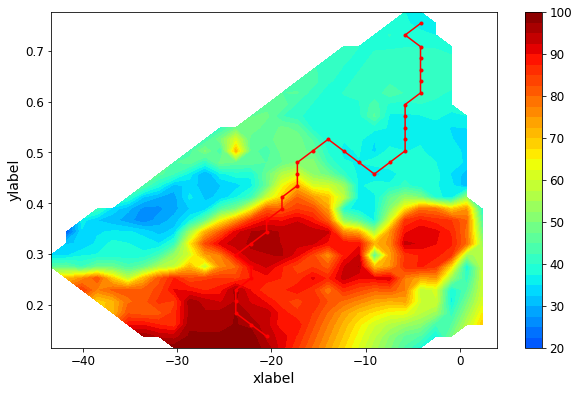

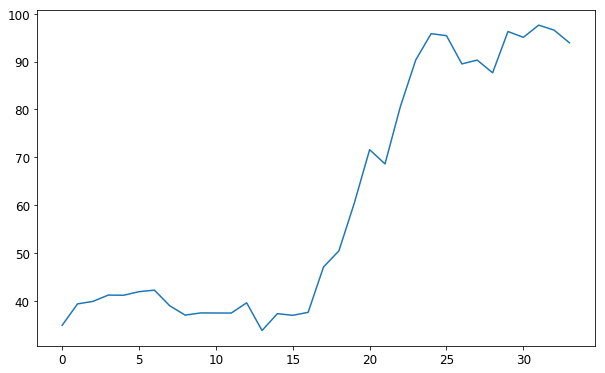

In [97]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 260
location = pre + "/sixth_with_real_distance_2/_280-350/2d_z_qw/without_subsample_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
# path, f = shortest_path(location2, start=(1, 14), end=(28,24), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

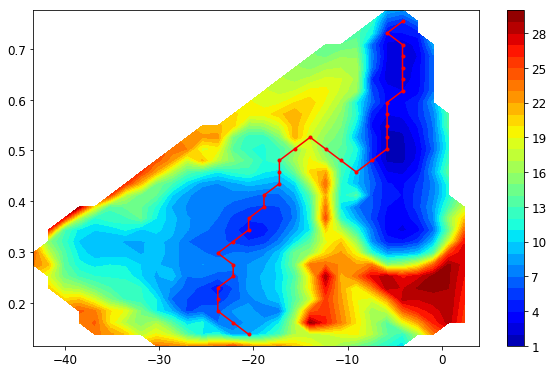

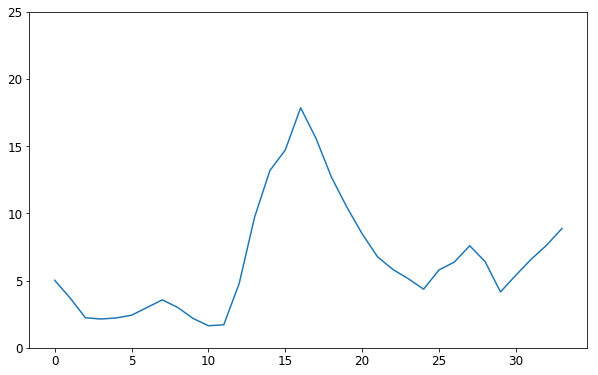

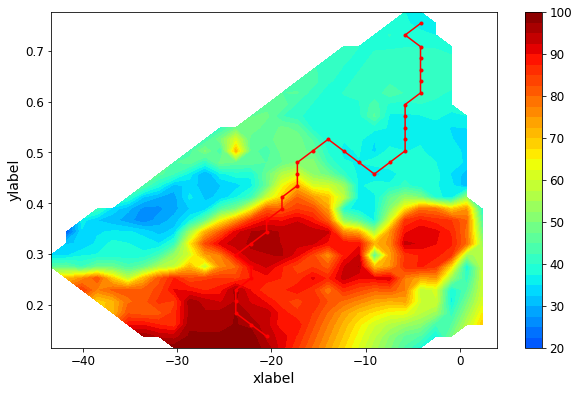

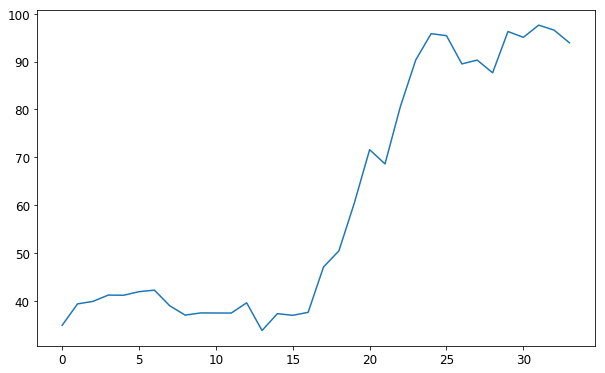

In [45]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 260
location = pre + "/sixth_with_real_distance_2/_280-350/2d_z_qw/without_subsample_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), end=(28,24), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

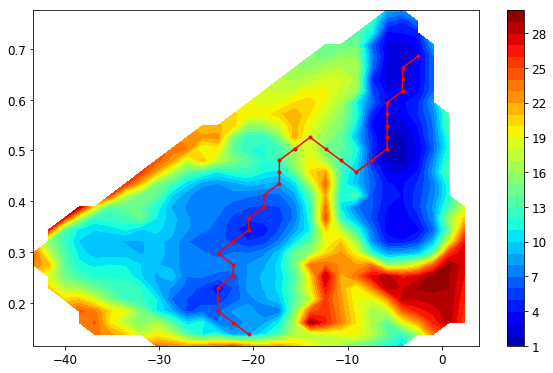

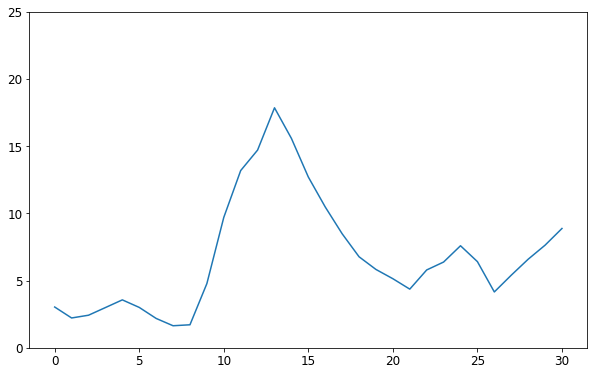

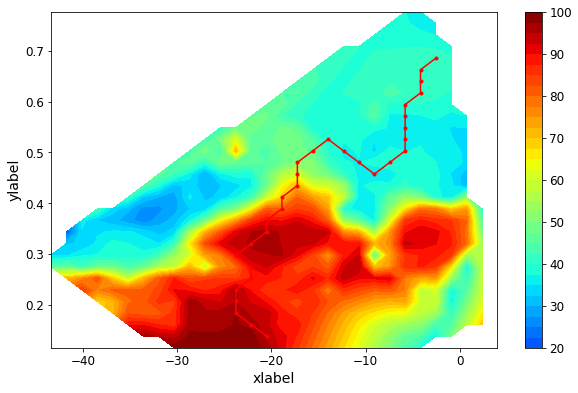

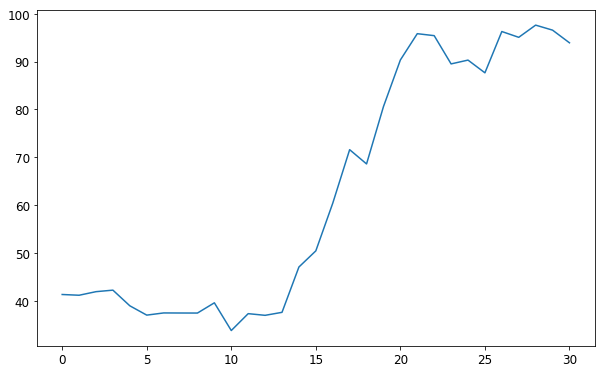

In [41]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 260
location = pre + "/sixth_with_real_distance_2/_280-350/2d_z_qw/without_subsample_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [450]:
all_data = pd.read_feather("/Users/weilu/Research/data/pulling/None_29_Mar_153435.feather")

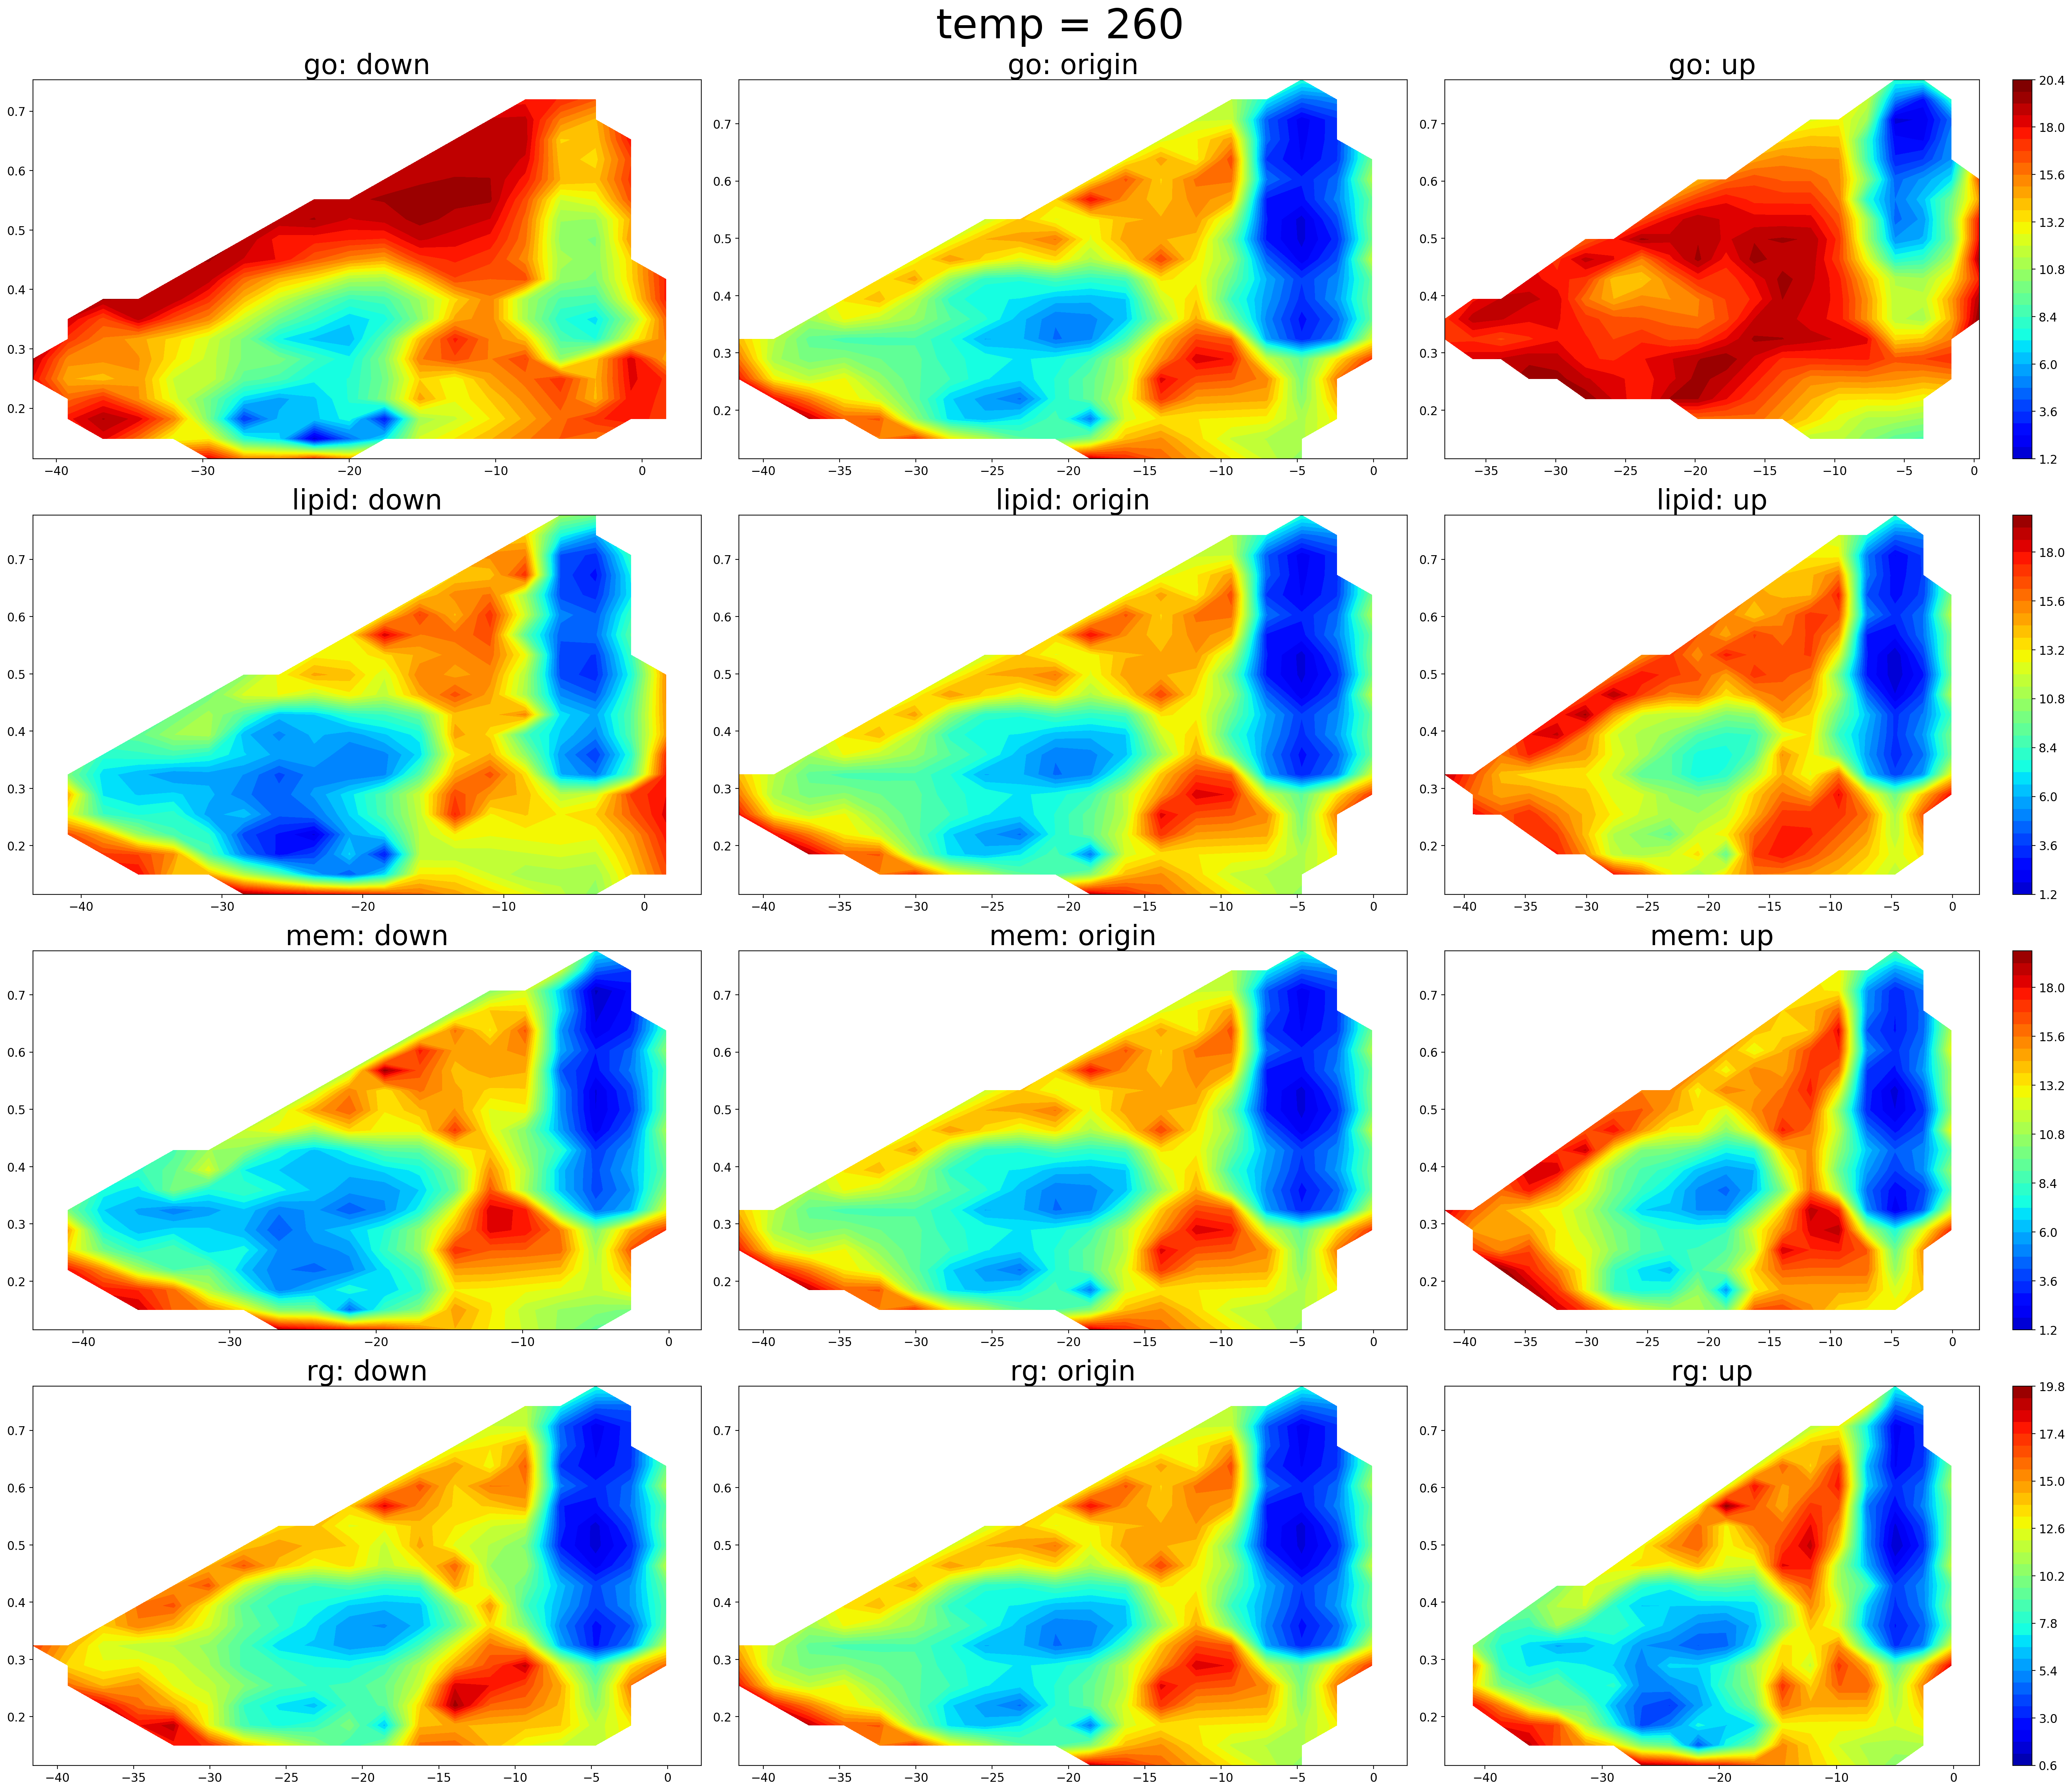

In [457]:
show_images_all(all_data, temp='260')
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/perturbation_freeEnergy.png", dpi=300)

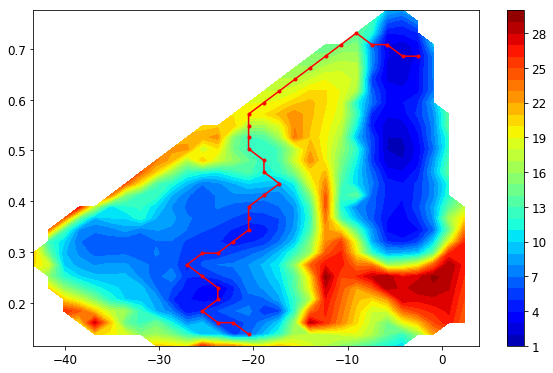

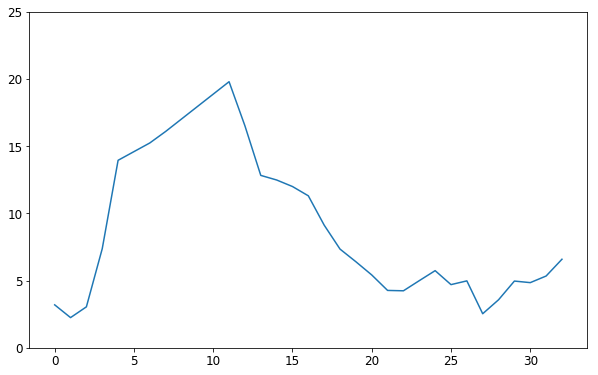

In [58]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_freeEnergy/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"perturbation-8-pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)

In [101]:
tt_list = []
# for i in range(18):
#     pre = "/Users/weilu/Research/server/mar_2018/05_week"
#     temp = 260
#     location = pre + f"/sixth_localQ/_280-350/{i}/force_0.2/"
#     location2 = location + f"pmf-{temp}.dat"
#     path, _ = shortest_path(location2, start=(1, 14), plot2d=False, plot1d=False)
#     location2 = location + f"evpb-{temp}.dat"
#     start = i*10
#     if i == 17:
#         span = 11
#     else:
#         span = 10
#     tt = get_localQ(location2, path, start=start, span=span)
#     tt_list.append(tt.T)
# tt = np.concatenate(tt_list)

for i in range(36):
    pre = "/Users/weilu/Research/server/mar_2018/05_week"
    temp = 260
    location = pre + f"/sixth_new_localQ/_280-350/{i}/force_0.2/"
    location2 = location + f"pmf-{temp}.dat"
    path, f = shortest_path(location2, start=(1, 14), end=(28,24), plot2d=False, plot1d=False)
    location3 = location + f"evpb-{temp}.dat"
    start = i*5
    if i == 35:
        span = 6
    else:
        span = 5
    tt = get_localQ(location3, path, start=start, span=span)
    tt_list.append(tt.T)
tt = np.concatenate(tt_list)

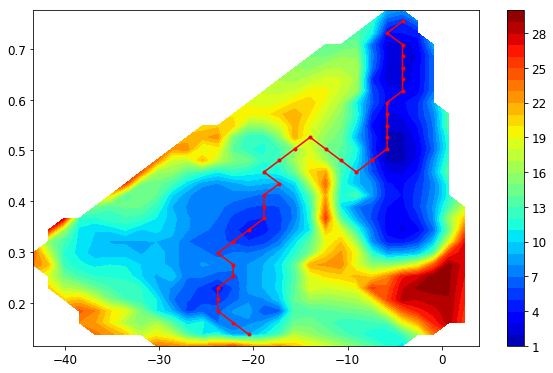

In [102]:
path, f = shortest_path(location2, start=(1, 14), end=(28,24), plot2d=True, plot1d=False)

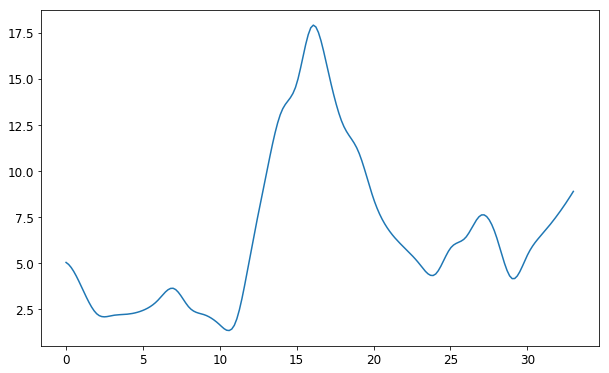

In [93]:
from scipy.interpolate import CubicSpline
x = np.array(range(len(f)))
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f, kind="cubic")
plt.plot(x_smooth, spl(x_smooth))
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/smoothed_shortest_path.png")

/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  after removing the cwd from sys.path.


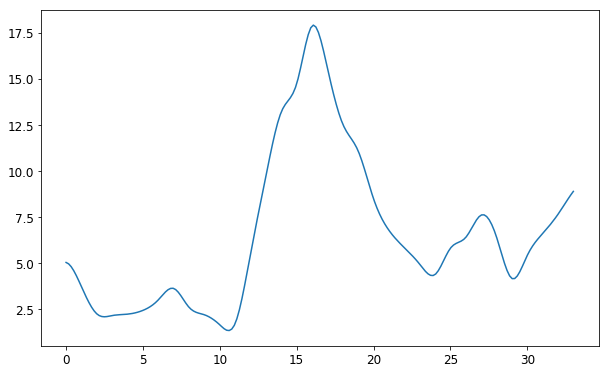

In [77]:
from scipy.interpolate import spline
x = np.array(range(len(f)))
x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = spline(x, f, x_smooth)
plt.plot(x_smooth, y_smooth)

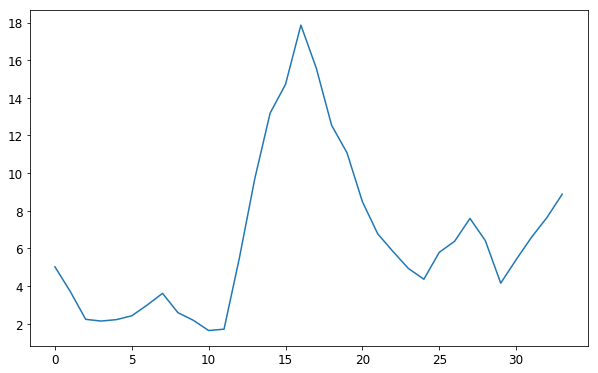

In [87]:
plt.plot(f)

In [47]:
tt.shape

(181, 34)

In [49]:
localQ = pd.DataFrame(tt, columns=["F" + str(i) for i in range(34)])
localQ["Sum"] = localQ.sum(axis=1)
tt2 = localQ.query("Sum > 0").drop("Sum",axis=1).values

In [50]:
labels = localQ.query("Sum > 0").drop("Sum",axis=1).reset_index().values[:,0]

In [51]:
tt2

array([[  4.17367558e-01,   3.07759175e-02,   1.04022800e-02, ...,
          1.59403350e-02,   4.19330592e-02,   1.30161083e-03],
       [  2.38377815e-01,   4.40934686e-02,   1.71889294e-01, ...,
          3.18246329e-01,   3.19849466e-01,   4.96658867e-01],
       [  4.30454464e-01,   1.22702951e-01,   1.99567439e-01, ...,
          2.96046240e-01,   2.34980071e-01,   3.92351472e-01],
       ..., 
       [ -4.88505747e-04,   1.79055842e-03,   2.59718945e-01, ...,
          2.75265613e-01,   3.03554601e-01,   3.07352803e-01],
       [ -4.88505747e-04,   1.19370561e-03,   5.13262062e-01, ...,
          3.91835488e-01,   4.98613993e-01,   6.01486583e-01],
       [ -4.88505747e-04,   0.00000000e+00,   1.31675881e-01, ...,
          9.77029954e-02,   6.02587381e-02,   1.03455830e-03]])

In [52]:
tt2.shape

(166, 34)

In [53]:
tt2 =  np.where(tt2 < 0, 0, tt2)
tt2 =  np.where(tt2 > 1, 1, tt2)

In [54]:
import matplotlib
v = np.linspace(0, 1.0, 5, endpoint=True)

In [55]:
x = np.linspace(0,1,34)

In [56]:
Xi, Yi = np.meshgrid(x, labels)

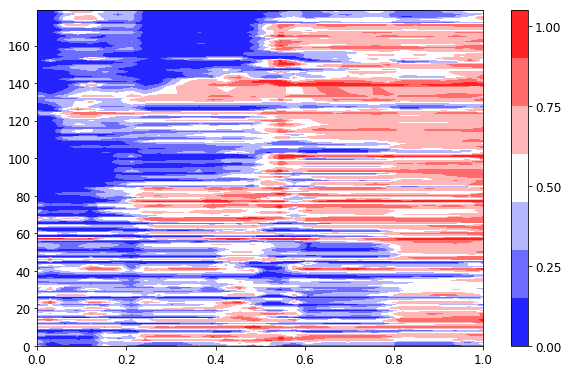

In [57]:
# fig, ax = plt.subplots()
plt.contourf(Xi, Yi, tt2, cmap="bwr")
# plt.clim(0,1)
plt.colorbar(ticks=v)
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/shortest_path_localQ", dpi=300)
# ax = plt.axes()

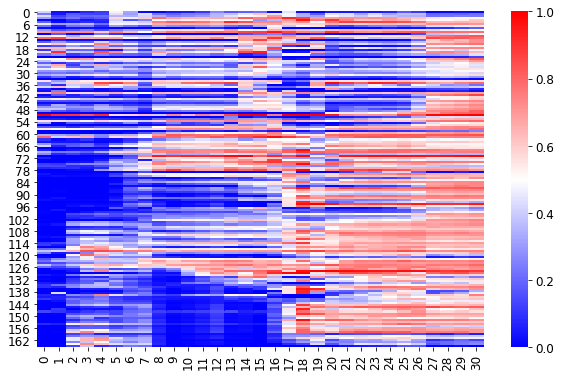

In [499]:
plt.figure()
sns.heatmap(tt2, cmap="bwr")

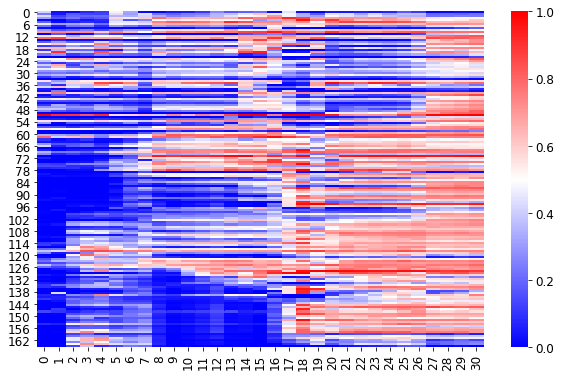

In [493]:
plt.figure()
sns.heatmap(tt2, cmap="bwr")
# plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/shortest_path_localQ.png", dpi=300)

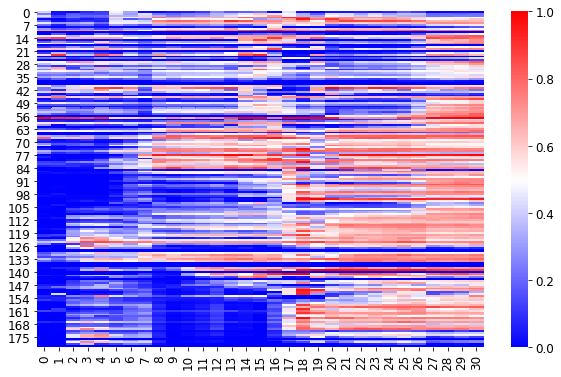

In [398]:
plt.figure()
sns.heatmap(tt, cmap="bwr")
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/shortest_path_localQ.png", dpi=300)

In [ ]:
x = np.linspace(0, 31)

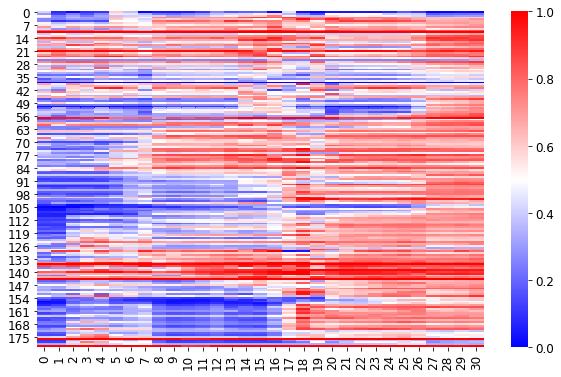

In [344]:
plt.figure()
sns.heatmap(tt, cmap="bwr")
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/shortest_path_localQ.png", dpi=300)

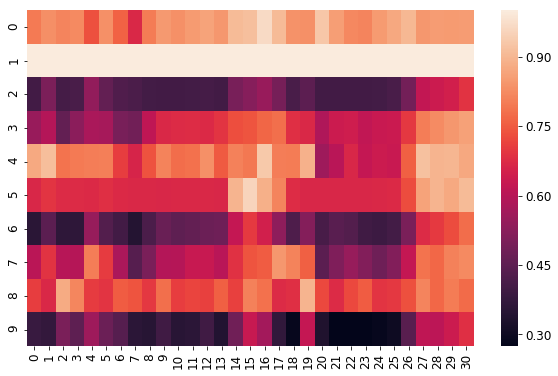

In [324]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_localQ/_280-350/1/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, _ = shortest_path(location2, start=(1, 14), plot2d=False, plot1d=False)
location2 = location + f"evpb-{temp}.dat"

plt.figure()
tt = get_localQ(location2, path)
sns.heatmap(tt.T)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_localQ.png", dpi=300)
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)

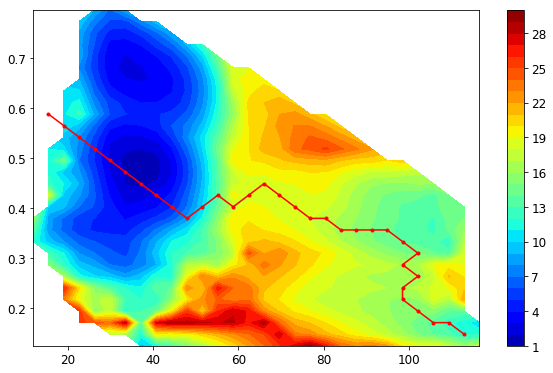

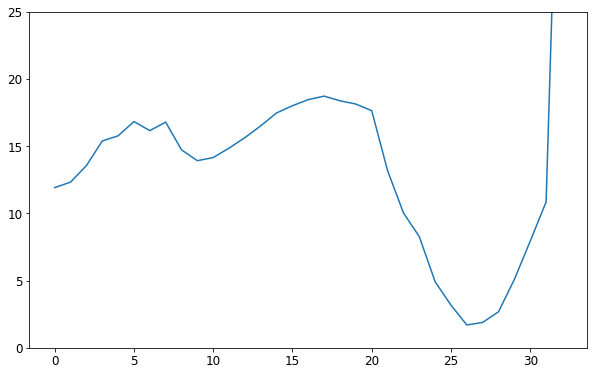

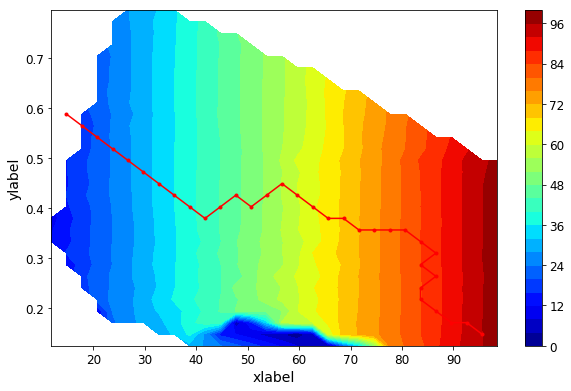

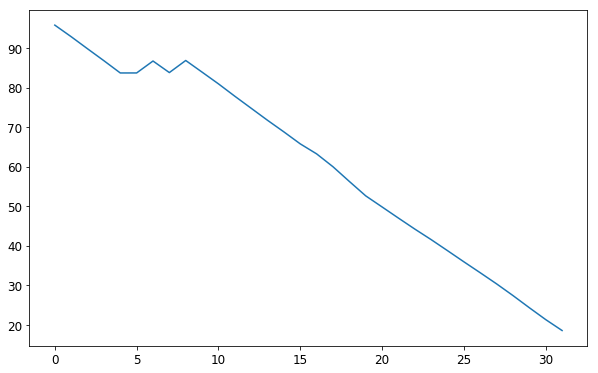

In [394]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 280
location = pre + "/eighth_with_real_distance/_280-350/2d_qw_dis/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(20, 1), end=(1, 28), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

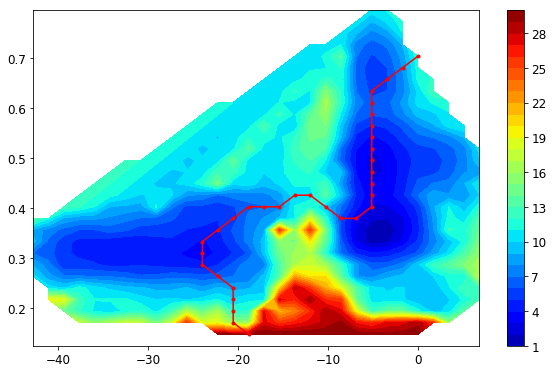

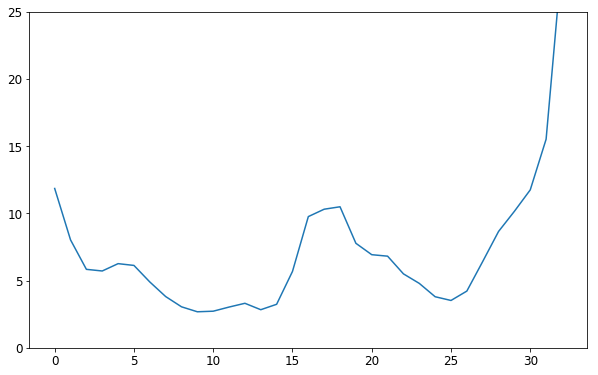

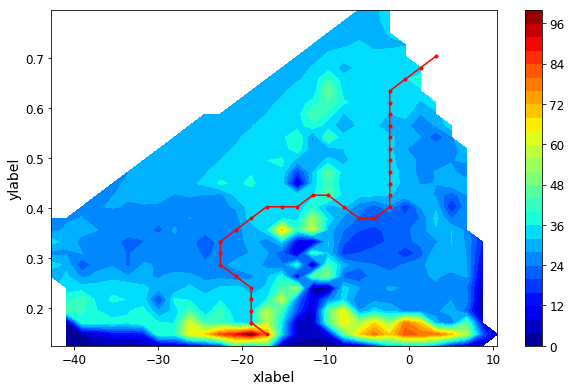

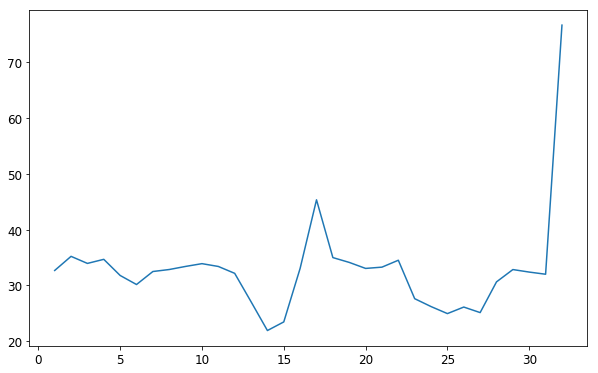

In [377]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 300
location = pre + "/eighth_with_real_distance/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

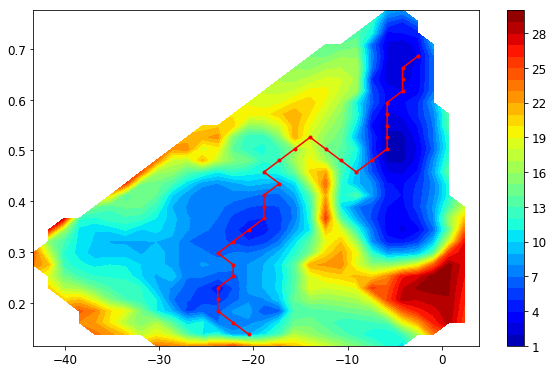

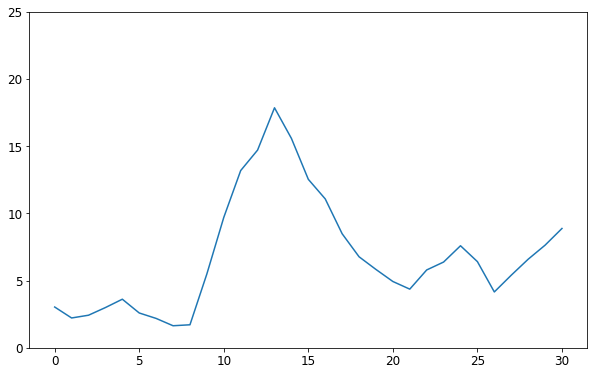

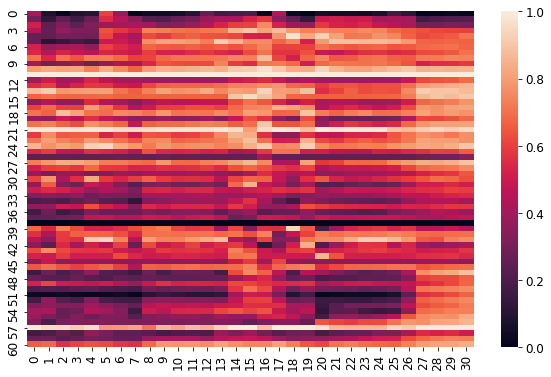

In [283]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_localQ/_280-350/first/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, _ = shortest_path(location2, start=(1, 14))
location2 = location + f"evpb-{temp}.dat"

plt.figure()
tt = get_localQ(location2, path)
sns.heatmap(tt.T)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_localQ.png", dpi=300)
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)

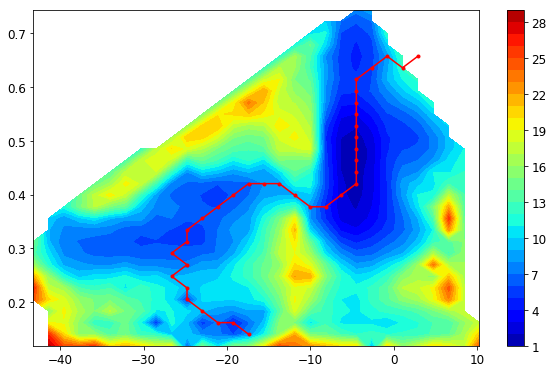

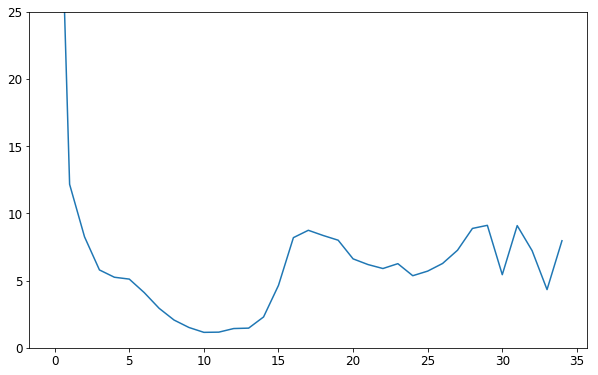

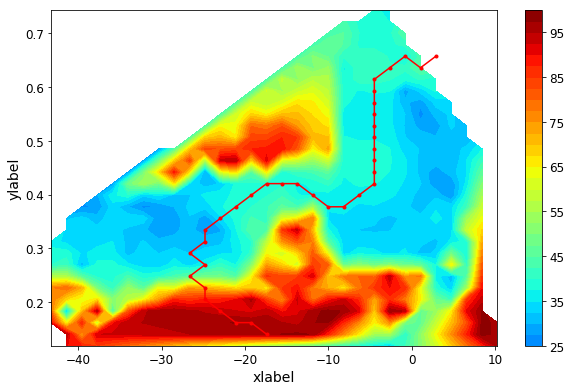

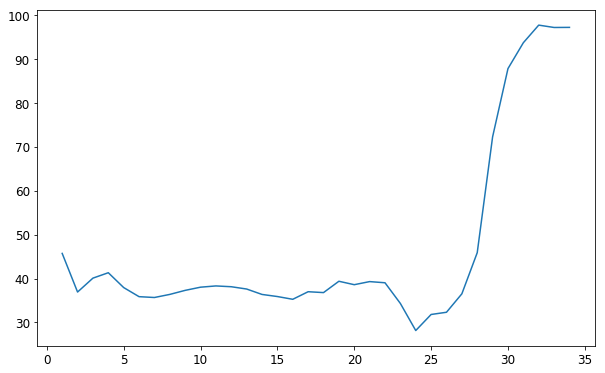

In [277]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_localQ/_280-350/second/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, _ = shortest_path(location2, start=(1, 14))
location2 = location + f"evpb-{temp}.dat"
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)

plt.figure()
data = pd.read_table(location2, sep='\s+', skiprows=1, names=[ "x", "y"] + ["Q" +str(i) for i in range(62)])
d = data.dropna().values
res = 30
xi = np.linspace(min(d[:,1]), max(d[:,1]), res)
yi = np.linspace(min(d[:,2]), max(d[:,2]), res)
xv, yv = np.meshgrid(xi, yi)
zi = griddata((d[:,1], d[:,2]), d[:,3:], (xv, yv), method='linear')
nested_lst_of_tuples = [tuple(l) for l in path]
tt = np.array([zi[l] for l in nested_lst_of_tuples])
sns.heatmap(tt.T)

../notebookFunctions.py:91: UserWarning: loadtxt: Empty input file: "/Users/weilu/Research/server/mar_2018/05_week/sixth_localQ/_280-350/second/force_0.2/pmf-260.dat"
  data = np.loadtxt(location)


AxisError: axis 1 is out of bounds for array of dimension 1

In [157]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 250
location = pre + "/sixth_with_real_distance/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path = shortest_path(location2, start=(1, 14))
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/weilu/Research/server/mar_2018/05_week/sixth_with_real_distance/_280-350/2d_z_qw/force_0.2/pmf-250.dat'

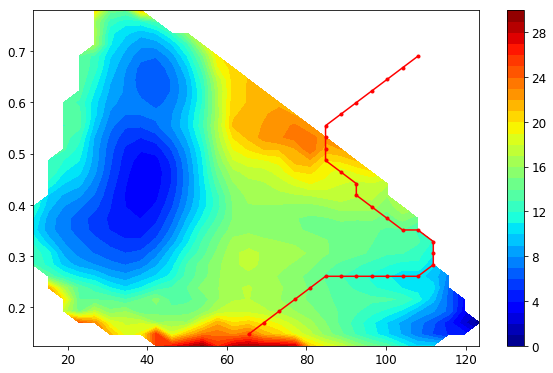

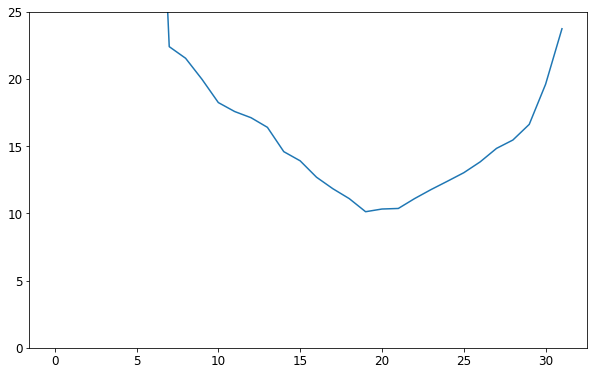

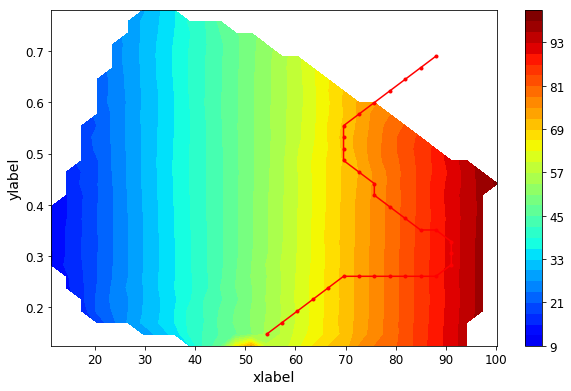

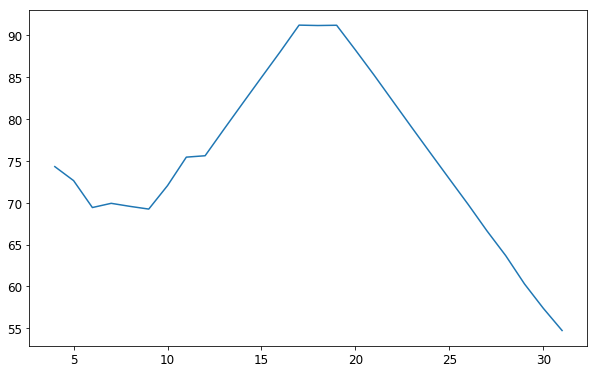

In [85]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 300
location = pre + "/seventh_with_real_distance/_280-350/2d_qw_dis/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path = shortest_path(location2, start=(1, 14))
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)

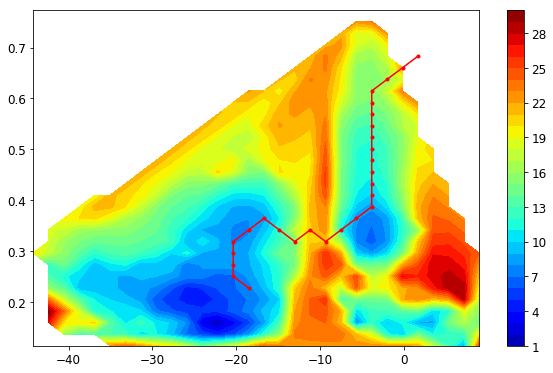

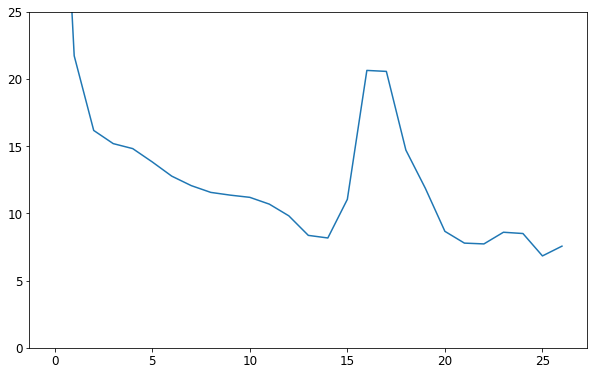

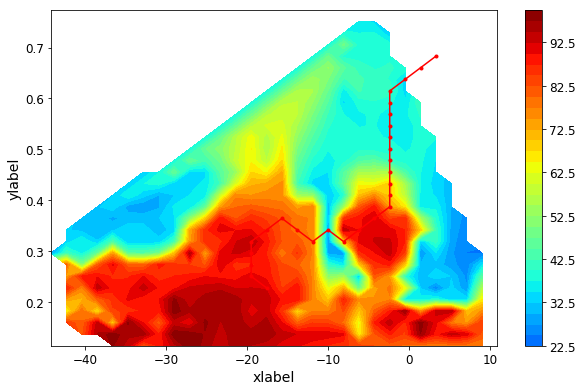

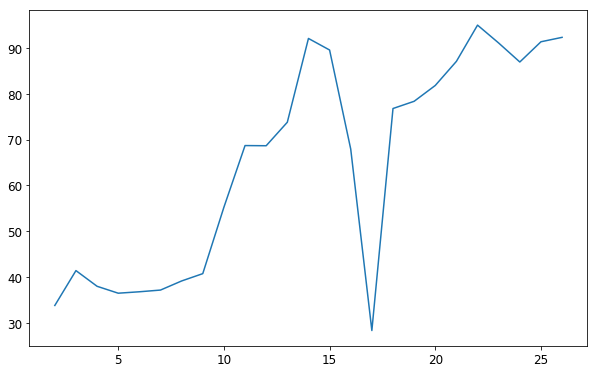

In [37]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 300
location = pre + "/sixth_first_2/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path = shortest_path(location2, start=(5, 14))
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)

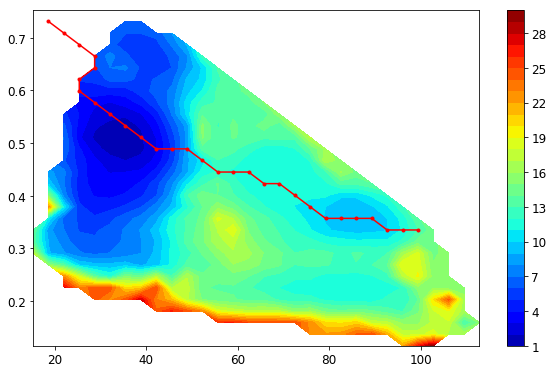

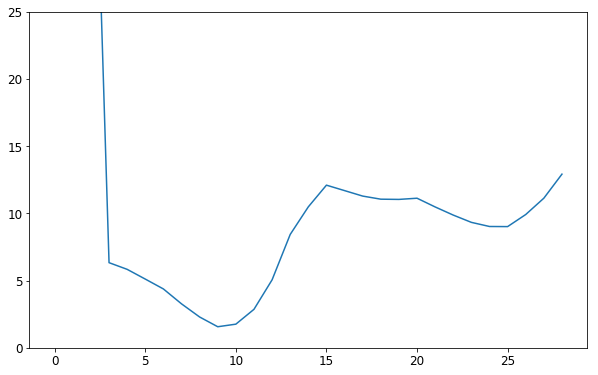

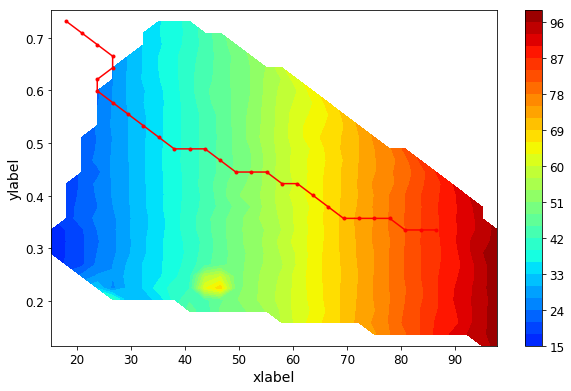

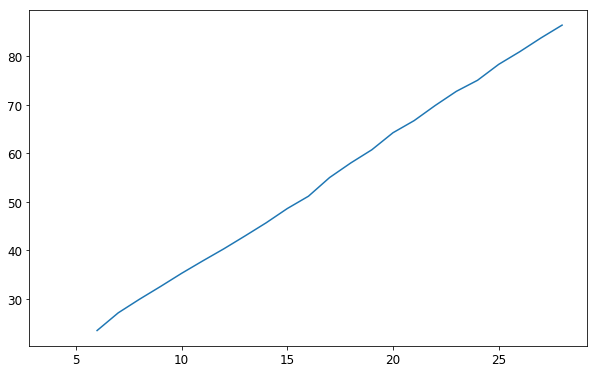

In [282]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 270
location = pre + "/sixth_with_real_distance_2/_280-350/2d_qw_dis/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, end=(28, 1), start=(10,25), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)